<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Deep%20Learning/DNN_CIFAR_10_catagorical_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# CIFAR 10 Data_Set Load & Review

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)

50000
[[6]
 [9]
 [9]
 [4]
 [1]]


In [4]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)

10000
[[3]
 [8]
 [8]
 [0]
 [6]]


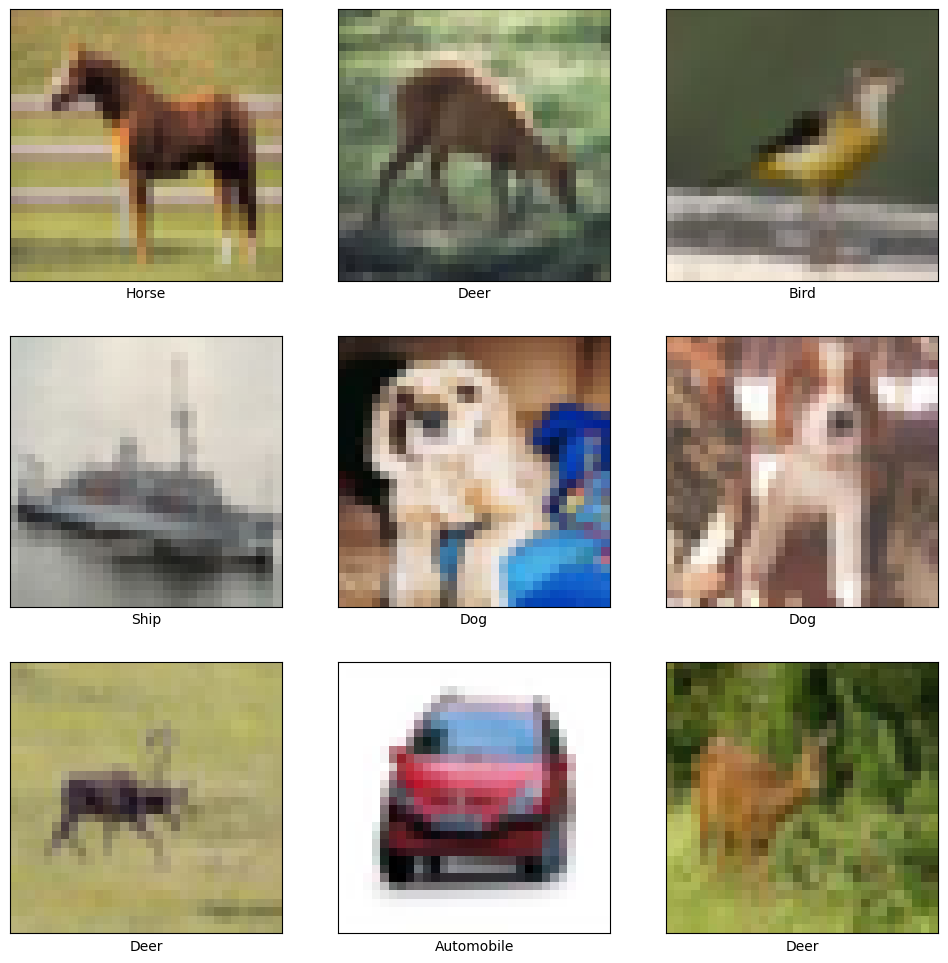

In [5]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Trunk']

import matplotlib.pyplot as plt
import numpy as np

Indexes = np.random.randint(50000,
                            size=9)

plt.figure(figsize = (12,12))
for i, idx in enumerate(Indexes):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx])
  plt.xlabel(class_names[int(y_train[idx])])

plt.show()

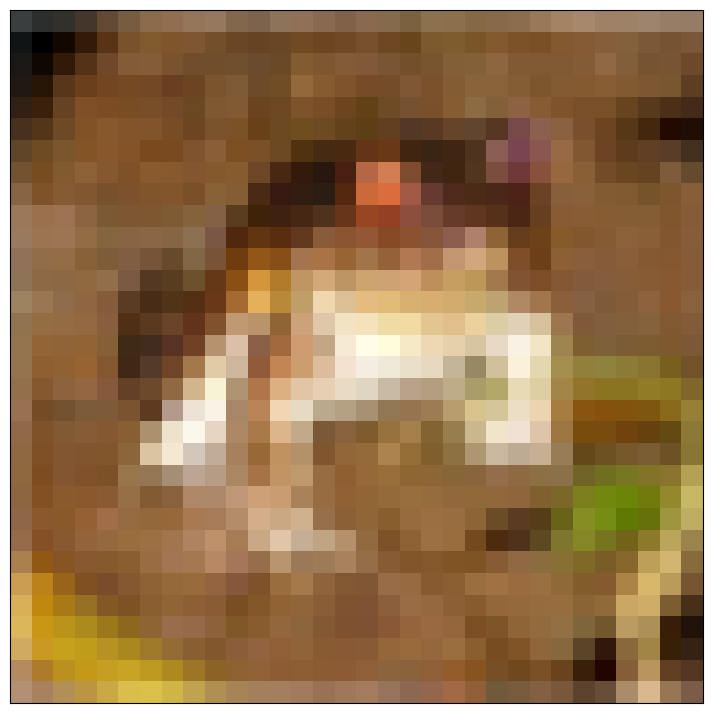

In [6]:
digit = X_train[0]

plt.figure(figsize = (9,9))
plt.imshow(digit)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
import numpy as np
import sys

np.set_printoptions(linewidth = 150, threshold=sys.maxsize)

print(y_train[0])
print()
print(X_train[0][0][0])
# print(X_train[0][:,:,0])

[6]

[59 62 63]


# Data Preprocessing

In [9]:
X_train = X_train.reshape((50000,32*32*3))
X_test = X_test.reshape((10000,32*32*3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [10]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [11]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 0.16862745 0.18039216 0.17647059 0.19607843 0.18823529 0.16862745 0.26666667 0.21176471 0.16470588 0.38431373
 0.28627451 0.20392157 0.46666667 0.35686275 0.24705882 0.54509804 0.41960784 0.29411765 0.56862745 0.43137255 0.31372549 0.58431373 0.45882353
 0.34901961 0.58431373 0.47058824 0.36470588 0.51372549 0.40392157 0.30196078 0.49019608 0.38823529 0.29803922 0.55686275 0.45098039 0.35686275
 0.56470588 0.43921569 0.3372549  0.5372549  0.41176471 0.30980392 0.50588235 0.38039216 0.27843137 0.5372549  0.41568627 0.30980392 0.5254902
 0.41568627 0.29803922 0.48627451 0.38039216 0.25098039 0.54509804 0.44313725 0.30588235 0.54509804 0.43921569 0.29411765 0.52156863 0.41176471
 0.27058824 0.53333333 0.41176471 0.29019608 0.54509804 0.42352941 0.30196078 0.59607843 0.47058824 0.34901961 0.63921569 0.51372549 0.39215686
 0.65882353 0.53333333 0.42352941 0.62352941 0.50588235 0.4        0.61960784 0.50980392 0.40784314 0.61960784 0.51764706 0.42352941 0.59

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

# Keras Modeling

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32* 3,)))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

In [17]:
CIFAR.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2048)              6293504   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7409546 (28.27 MB)
Trainable params: 7409546 (28.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
CIFAR.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [20]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
313/313 [==============================] - 10s 10ms/step - loss: 2.0073 - accuracy: 0.2805 - val_loss: 1.7984 - val_accuracy: 0.3459
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 1.7278 - accuracy: 0.3813 - val_loss: 1.7034 - val_accuracy: 0.3908
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 1.6311 - accuracy: 0.4169 - val_loss: 1.5957 - val_accuracy: 0.4289
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 1.5683 - accuracy: 0.4399 - val_loss: 1.5461 - val_accuracy: 0.4516
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 1.5260 - accuracy: 0.4530 - val_loss: 1.5502 - val_accuracy: 0.4383
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 1.4861 - accuracy: 0.4678 - val_loss: 1.5202 - val_accuracy: 0.4677
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 1.4545 - accuracy: 0.4810 - val_loss: 1.5111 - val_accuracy: 

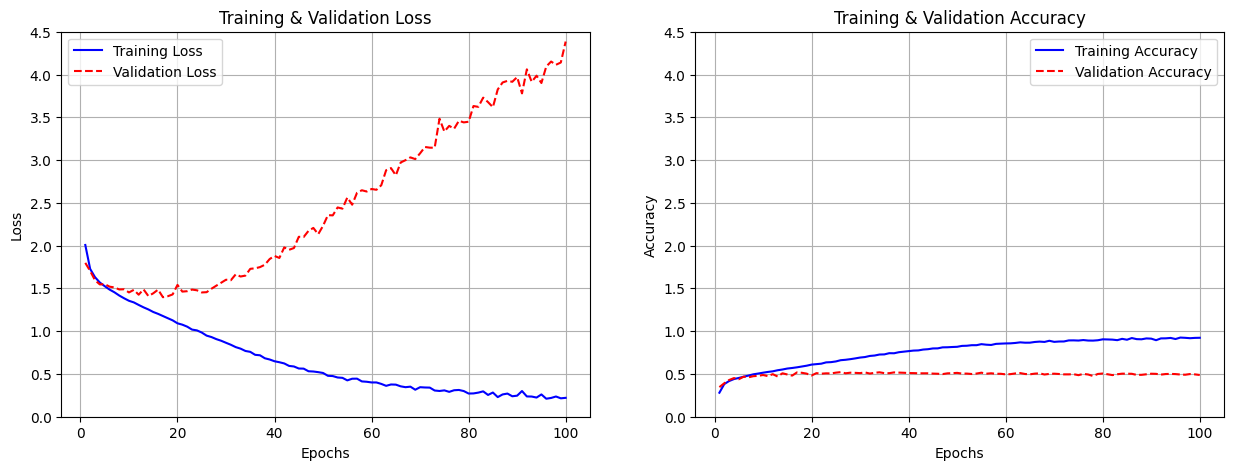

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(epochs, Hist_CIFAR.history['loss'],'b-')
plt.plot(epochs, Hist_CIFAR.history['val_loss'],'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 4.5)
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs, Hist_CIFAR.history['accuracy'],'b-')
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'],'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 4.5)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [23]:
loss, accuracy = CIFAR.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 4.40438
Accuracy = 0.48070


In [24]:
np.set_printoptions(suppress = True, precision = 9)

print(CIFAR.predict(X_test[:1, :], verbose = 0))

[[0.016341703 0.000041493 0.000130388 0.83095354  0.085934    0.059238717 0.000000723 0.000030746 0.006884952 0.000443821]]


In [25]:
print(np.argmax(CIFAR.predict(X_test[:1,:], verbose = 0)))

3


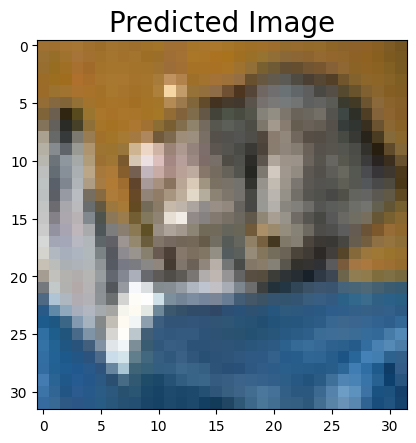

In [26]:
plt.imshow(X_test[0].reshape(32,32,3), cmap='gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()